C:\Users\mubi\AppData\Local\Temp\ipykernel_12664\2865752426.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


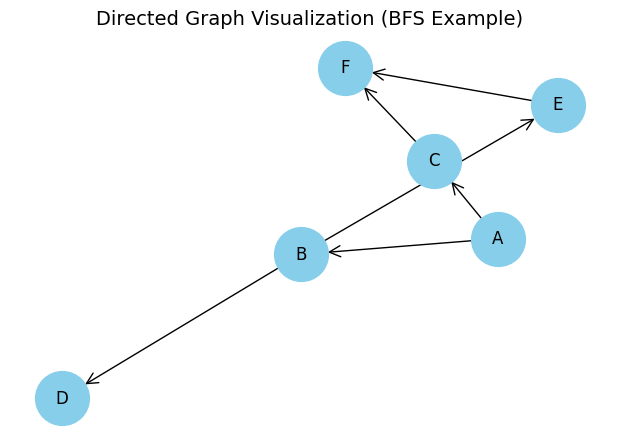

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph structure
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Set layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500,
        font_size=12, arrows=True, arrowstyle='->', arrowsize=20)
plt.title("Directed Graph Visualization (BFS Example)", fontsize=14)
plt.tight_layout()
plt.show()

In [1]:
import heapq

# Graph adjacency list 
graph = {
    'Src': ['1', '2', '3'],
    '1': ['4', '5'],
    '2': ['6'],
    '3': ['7', '8'],
    '4': [], '5': [], '6': [], '7': ['dest'], '8': ['dest'], 'dest': []
}

# Heuristic values for Best First Search (lower is better)
heuristics = {
    'Src': 20,
    '1': 22, '2': 21, '3': 10,
    '4': 25, '5': 24, '6': 30,
    '7': 5, '8': 12,
    'dest': 0
}

def best_first_search(graph, heuristics, start, goal):
    # Priority Queue to always choose node with lowest heuristic
    open_set = []
    heapq.heappush(open_set, (heuristics[start], start))
    
    visited = set()
    parent = {start: None}

    while open_set:
        h, current = heapq.heappop(open_set)
        print(f"Visiting: {current}")

        if current == goal:
            # Reconstruct the path from parent dictionary
            path = []
            while current:
                path.append(current)
                current = parent[current]
            path.reverse()
            return path

        visited.add(current)

        # Explore all neighbors
        for neighbor in graph[current]:
            if neighbor not in visited:
                heapq.heappush(open_set, (heuristics[neighbor], neighbor))
                parent[neighbor] = current

    return None  # Goal not found

# Run Best First Search
path = best_first_search(graph, heuristics, 'Src', 'dest')
print("Best First Search Path:", path)


Visiting: Src
Visiting: 3
Visiting: 7
Visiting: dest
Best First Search Path: ['Src', '3', '7', 'dest']


In [9]:
from collections import deque
graph = {
'A': ['B', 'C'],
'B': ['D', 'E'],
'C': ['F'],
'D': [],
'E': ['F'],
'F': []
}
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            queue.extend(i for i in graph[node] if i not in visited)

print("Breath First Search: ")
bfs(graph, 'A')
print("\n--------------------------- \n")
# Output: A B C D E F



def dfs(graph, start):
    visited = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            stack.extend(reversed(graph[node]))

print("Depth First Search: ")
dfs(graph, 'A') # Output: A B D E F C
print("\n--------------------------- \n")

Breath First Search: 
A B C D E F 
--------------------------- 

Depth First Search: 
A B D E F C 
--------------------------- 



# Breath First Search 

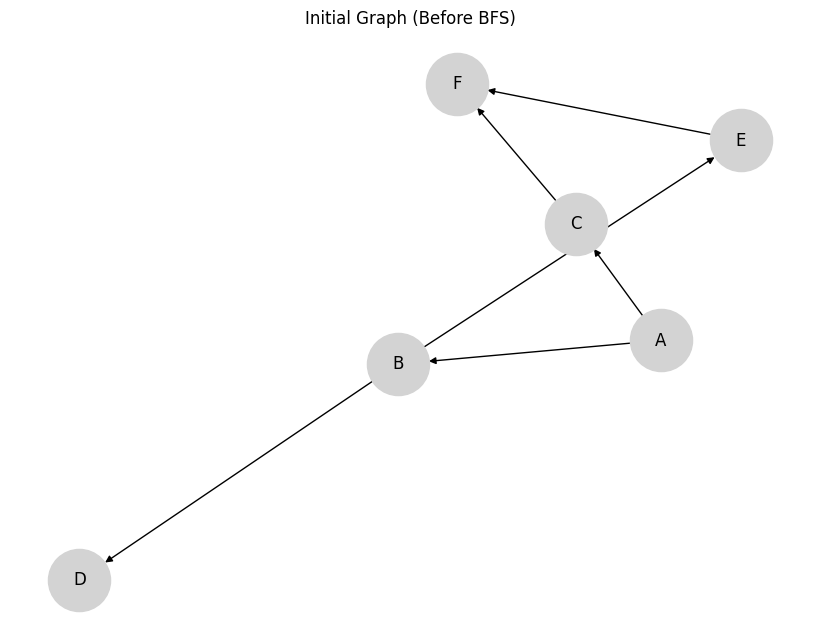

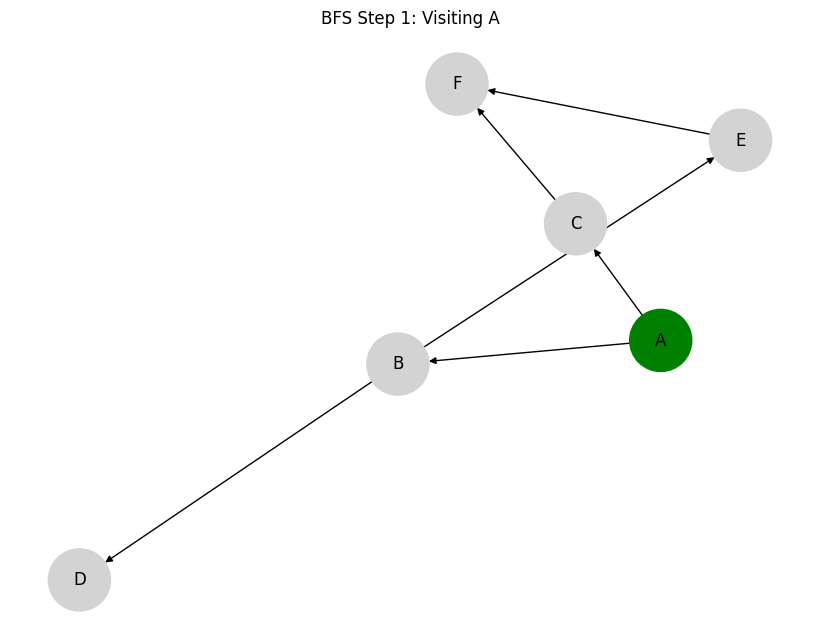

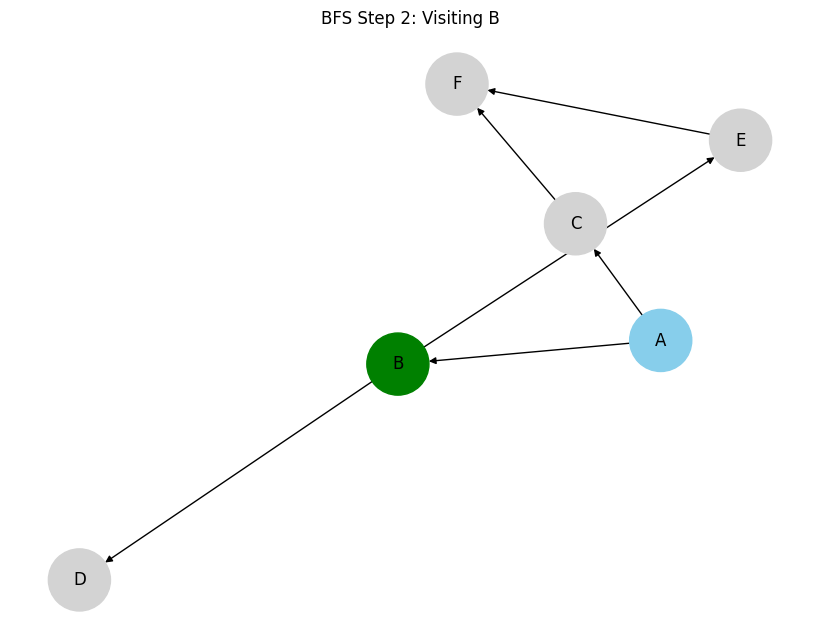

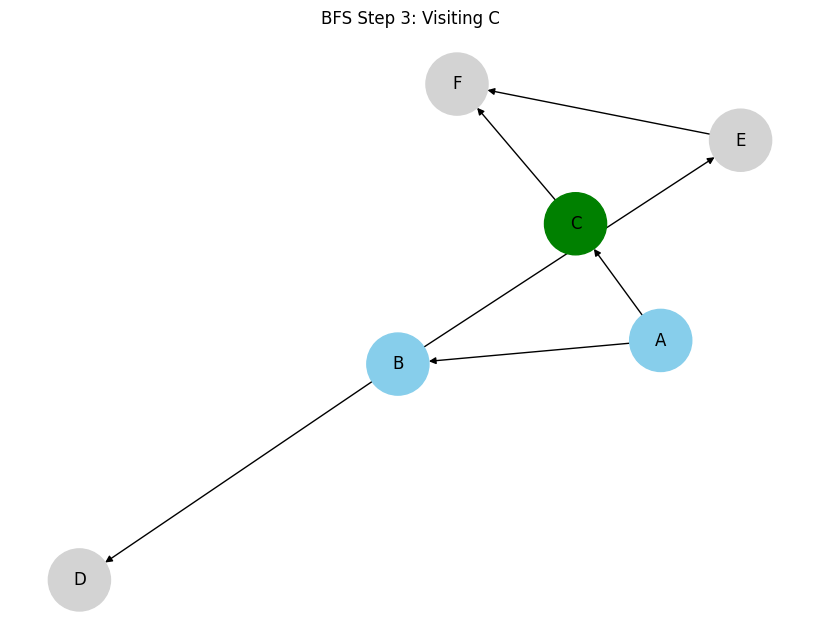

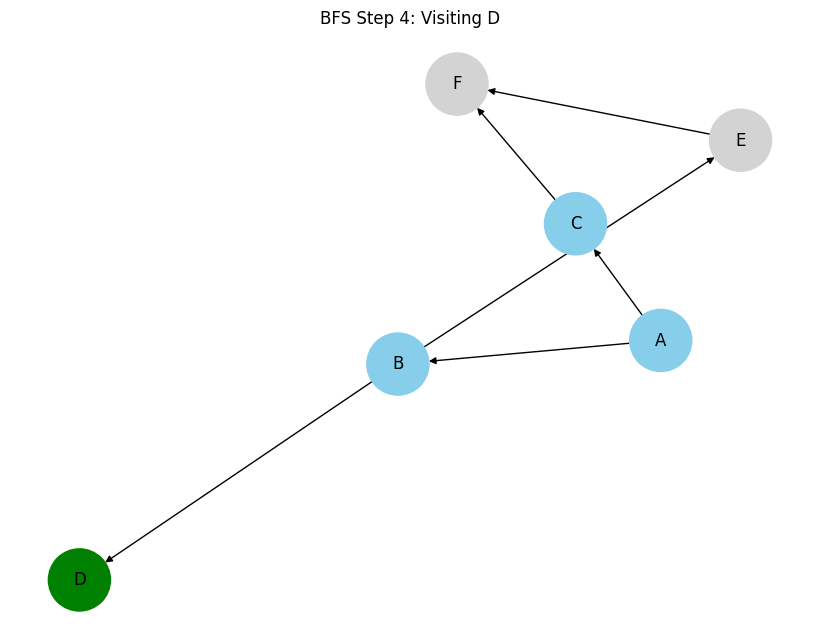

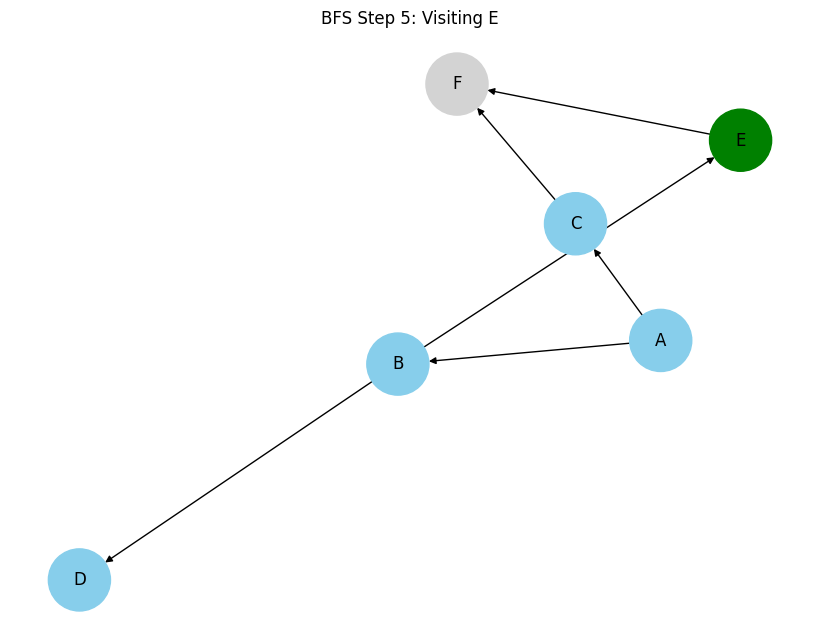

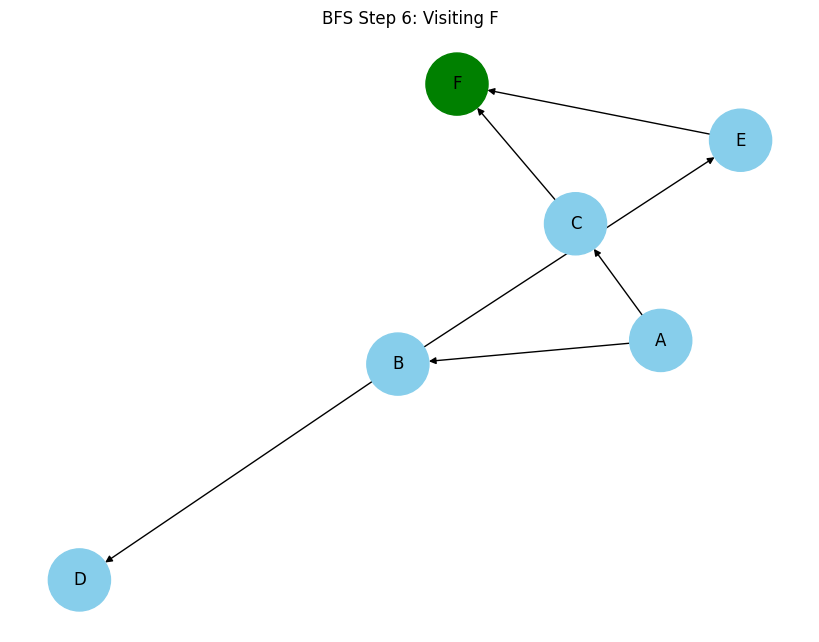

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time

# Define the graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Create a directed graph using NetworkX
G = nx.DiGraph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# BFS function with visualization
def bfs_visualize(graph, start):
    visited = set()
    queue = deque([start])
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for stable visualization
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=2000, arrows=True)
    plt.title("Initial Graph (Before BFS)")
    plt.show()
    time.sleep(1)

    step = 1
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            
            # Color nodes: visited = blue, current = green, unvisited = gray
            node_colors = []
            for n in G.nodes():
                if n == node:
                    node_colors.append('green')
                elif n in visited:
                    node_colors.append('skyblue')
                else:
                    node_colors.append('lightgray')

            plt.figure(figsize=(8,6))
            nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, arrows=True)
            plt.title(f"BFS Step {step}: Visiting {node}")
            plt.show()
            step += 1
            time.sleep(0.5)

            queue.extend(i for i in graph[node] if i not in visited)

# Run the BFS with visualization
bfs_visualize(graph, 'A')


# Depth First Search

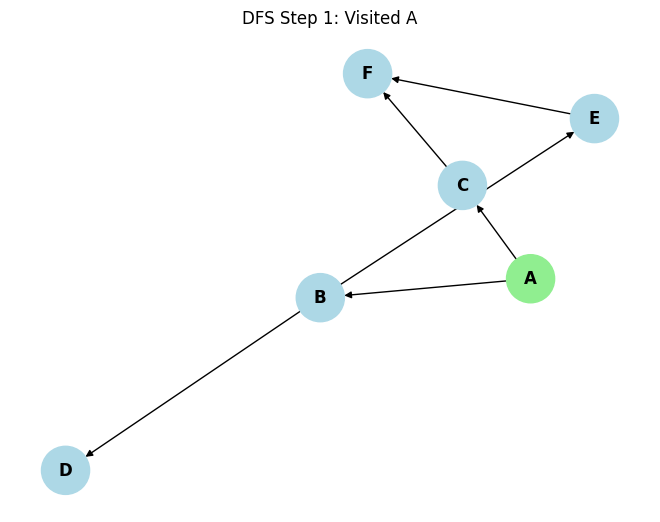

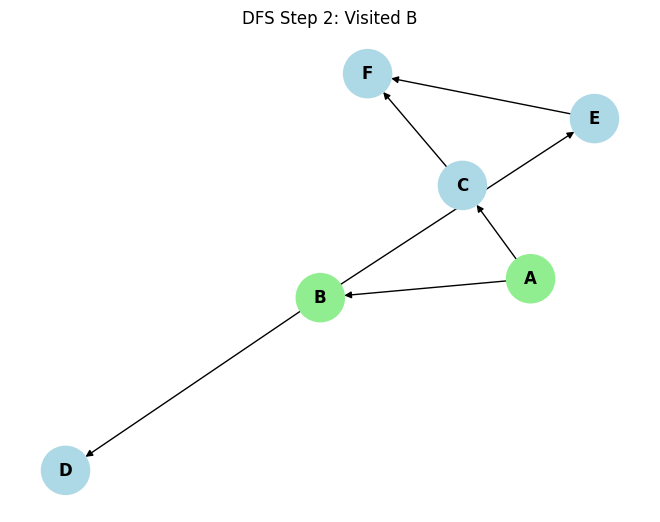

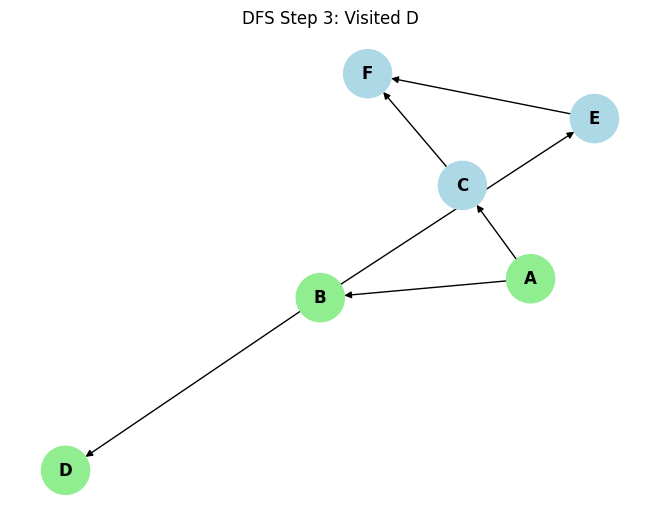

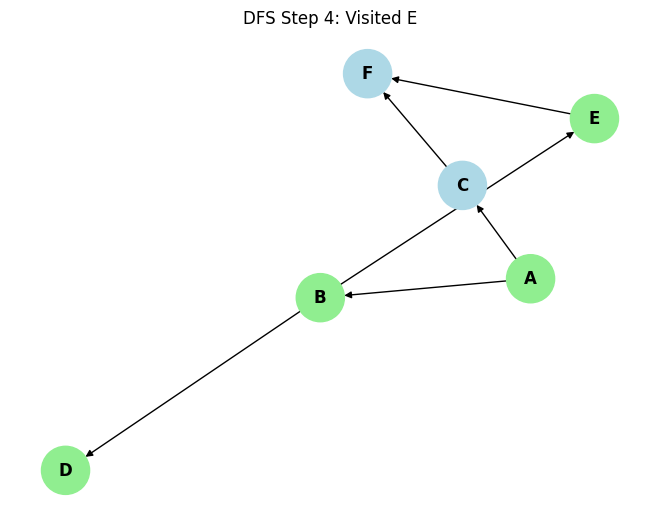

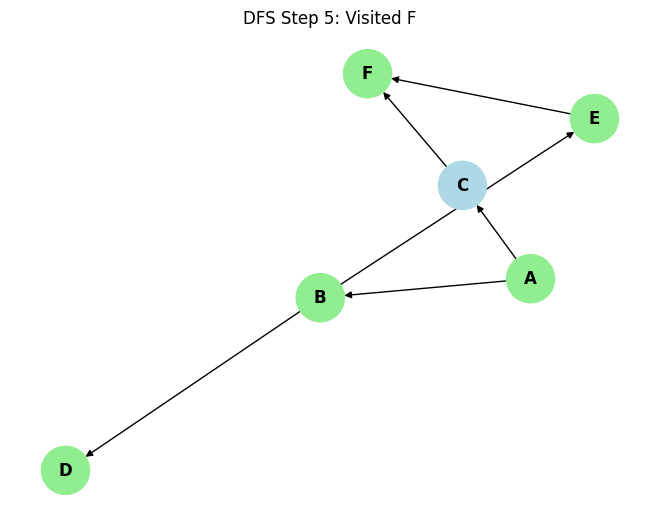

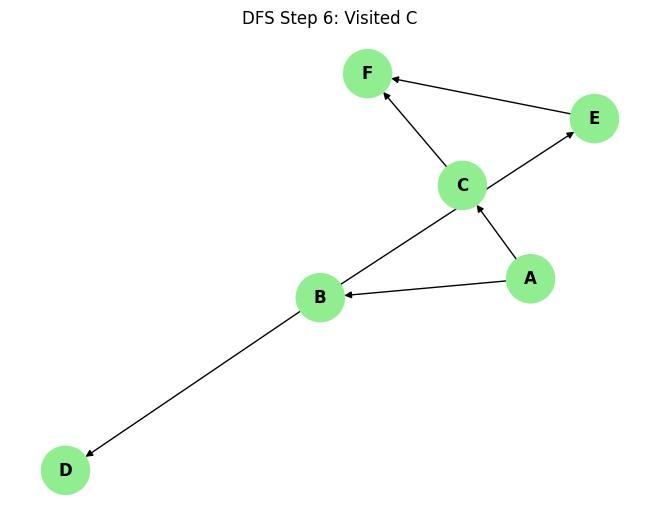

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Define the graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Create a directed graph in NetworkX
G = nx.DiGraph(graph)

# Define positions for nodes
pos = nx.spring_layout(G, seed=42)

# DFS Function with visualization
def visualize_dfs(graph, start):
    visited = set()
    stack = [start]
    step = 1
    
    plt.ion()  # Turn on interactive mode
    
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)

            # Draw graph at each step
            plt.clf()
            colors = ['lightgreen' if n in visited else 'lightblue' for n in G.nodes()]
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1200, font_weight='bold', arrows=True)
            plt.title(f"DFS Step {step}: Visited {node}")
            plt.show()
            plt.pause(1.2)
            step += 1
            
            # Push neighbors in reverse order (to match DFS order)
            stack.extend(reversed(graph[node]))
    
    plt.ioff()
    plt.show()

# Run visualization
visualize_dfs(graph, 'A')


In [2]:
import heapq
# Define the graph with edge costs (g(n))
graph = {
    'Src': [('1', 3), ('2', 2), ('3', 1)],
    '1': [('4', 4), ('5', 6)],
    '2': [('6', 6)],
    '3': [('7', 2), ('8', 2)],
    '4': [],
    '5': [],
    '6': [],
    '7': [('dest', 3)],
    '8': [('dest', 3)],
    'dest': []
}

# Define the heuristic values (h(n))
heuristics = {
    'Src': 20,
    '1': 22,
    '2': 21,
    '3': 10,
    '4': 25,
    '5': 24,
    '6': 30,
    '7': 5,
    '8': 12,
    'dest': 0
}

# A* algorithm
def a_star(graph, heuristics, start, goal):
    open_set = []
    heapq.heappush(open_set, (heuristics[start], 0, start, [start]))  

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current == goal:
            return path, g  # Return path and total cost

        for neighbor, cost in graph[current]:
            new_g = g + cost
            new_f = new_g + heuristics[neighbor]
            heapq.heappush(open_set, (new_f, new_g, neighbor, path + [neighbor]))

    return None, float('inf')

# Run the A* algorithm
path, total_cost = a_star(graph, heuristics, 'Src', 'dest')
print("A* Path:", path)
print("Total Cost:", total_cost)


A* Path: ['Src', '3', '7', 'dest']
Total Cost: 6


In [3]:
import heapq

# Define a weighted graph as an adjacency list
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 3)],
    'D': [],
    'E': [('F', 1)],
    'F': []
}

# UCS implementation
def ucs(graph, start, goal):
    visited = set()
    queue = [(0, start, [])]  # (cost, current_node, path)

    while queue:
        cost, node, path = heapq.heappop(queue)

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        print(f"Visiting: {node} with cost: {cost}")

        if node == goal:
            print(f"Goal '{goal}' reached with total cost: {cost}")
            print(f"Path: {' -> '.join(path)}")
            return

        for neighbor, edge_cost in graph[node]:
            if neighbor not in visited:
                heapq.heappush(queue, (cost + edge_cost, neighbor, path))

    print(f"Goal '{goal}' not reachable from '{start}'")

# Example usage
start_node = 'A'
goal_node = 'F'

ucs(graph, start_node, goal_node)

Visiting: A with cost: 0
Visiting: B with cost: 1
Visiting: D with cost: 3
Visiting: C with cost: 4
Visiting: E with cost: 6
Visiting: F with cost: 7
Goal 'F' reached with total cost: 7
Path: A -> B -> E -> F


C:\Users\mubi\AppData\Local\Temp\ipykernel_12664\1079332410.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


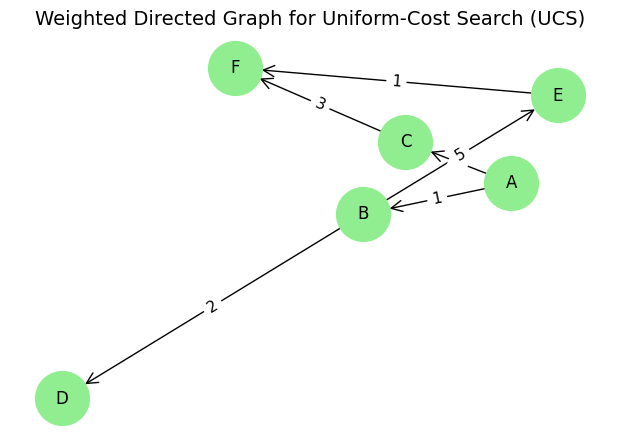

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the weighted directed graph
edges = [
    ('A', 'B', 1),
    ('A', 'C', 4),
    ('B', 'D', 2),
    ('B', 'E', 5),
    ('C', 'F', 3),
    ('E', 'F', 1)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Set layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500,
        font_size=12, arrows=True, arrowstyle='->', arrowsize=20)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=11)

plt.title("Weighted Directed Graph for Uniform-Cost Search (UCS)", fontsize=14)
plt.tight_layout()
plt.show()